In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from scipy.stats import norm

In [2]:
# population random variable
rho = 0.3
rv = multivariate_normal(
    [0.0, 0.0], 
    [
        [1.0, rho], 
        [rho, 1.0]
    ]
)

In [3]:
num_cal_draws = 1_000
cal_draws = rv.rvs(num_cal_draws)
cal_X, cal_theta = cal_draws[:,0], cal_draws[:,1]

In [8]:
num_test_draws = 1_000
test_draws = rv.rvs(num_test_draws)
test_X, test_theta = test_draws[:,0], test_draws[:,1]

In [9]:
def ci_len(phi):
    alpha = 0.05
    var_scores = 1 / norm.pdf(cal_theta, loc=phi * cal_X, scale=1 - rho ** 2)
    q_hat = np.quantile(var_scores, q = 1 - alpha)

    # can do grid naively for this simple case (wouldn't work in real cases but fine for toy)
    discretization = 0.1
    theta_grid = np.tile(np.arange(-10, 10, discretization), (num_test_draws, 1))
    test_X_grid = np.tile(test_X, (theta_grid.shape[1], 1)).T
    grid_scores = 1 / norm.pdf(theta_grid, loc=phi * test_X_grid, scale=1 - rho ** 2)

    # hacky solution to vectorize this computation, but hey, I like it
    theta_grid[grid_scores < q_hat] = discretization
    theta_grid[grid_scores > q_hat] = 0
    interval_lengths = np.sum(theta_grid, axis=1)
    return np.mean(interval_lengths)

In [10]:
phis = np.arange(-1, 1, 0.01)
ci_lens = [ci_len(phi) for phi in phis]

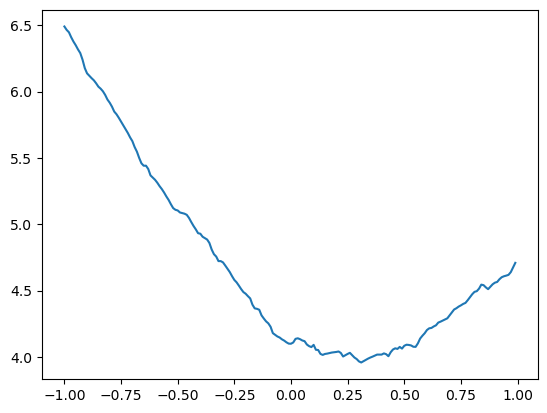

In [7]:
plt.plot(phis, ci_lens)